# GBM and LAT LLE Catalog Analysis


Using **3ML's** catalog and data downloading tools, it is easy to build and analysis for either a single or multiple GRBs  from start to finish

In [1]:
%matplotlib inline
%matplotlib notebook
import os
os.environ["MKL_NUM_THREADS"] = '1'
os.environ["OMP_NUM_THREADS"] = '1'
os.environ["NUMEXPR_NUM_THREADS"] = '1'
from threeML import *



get_available_plugins()

Configuration read from /Users/jburgess/.threeML/threeML_config.yml
Available plugins:

FermiGBMTTELike for Fermi GBM TTE (all detectors)
FermiLATLLELike for Fermi LAT LLE
OGIPLike for All OGIP-compliant instruments
EventListLike for Generic EventList data
SwiftXRTLike for Swift XRT
VERITASLike for VERITAS


## GBM catalog

The **3ML** GBM catalog allows you to search via cones on the sky, trigger names, T90s or date ranges.

In [2]:
gbm_catalog = FermiGBMBurstCatalog()

The cache for fermigbrst does not yet exist. We will try to build it

Building cache for fermigbrst.



### Searching cones on the sky

In [3]:
gbm_catalog.cone_search(ra=0,dec=0,radius=10)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


name,ra,dec,trigger_time,t90
,deg,deg,mjd,s
object,float64,float64,float64,float64
GRB080810549,356.800,0.320,54688.5487567,107.457
GRB090703329,0.770,9.680,55015.3291953,8.960
GRB100612726,352.000,-1.830,55359.7264598,8.576
GRB100924165,0.672,7.004,55463.1653740,9.024
GRB110729142,353.390,4.970,55771.1424297,408.582
GRB110921444,6.090,-5.830,55825.4436135,149.507
GRB111113410,4.320,-7.520,55878.4098583,15.360
GRB120624309,4.773,7.167,56102.3086266,0.640


Or perhaps we want to know the GRBs around the Crab nebula:

In [4]:
gbm_catalog.search_around_source('Crab',radius=5)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


(83.63309062468973, 22.014494786634714, <Table masked=True length=4>
     name        ra     dec    trigger_time   t90   
                deg     deg        mjd         s    
    object    float64 float64    float64    float64 
 ------------ ------- ------- ------------- --------
 GRB090612619  81.030  17.710 54994.6186400   42.433
 GRB090907808  81.060  20.500 55081.8081884    0.832
 GRB100130777  78.570  20.830 55226.7767993   86.018
 GRB100915243  85.394  25.095 55454.2428196    7.936)

### Searching on T90 and time

Perhaps we want to analyze all short GRBs or GRBs in a specific date range.

First let's search on T90:

In [5]:

gbm_catalog.search_t90(t90_less=2)


name,ra,dec,trigger_time,t90
,deg,deg,MJD,s
str30,float64,float64,float64,float64
GRB080723913,113.300,-19.700,54670.9134613,0.192
GRB080725541,354.800,8.900,54672.5412473,0.960
GRB080802386,154.300,40.700,54680.3855385,0.576
GRB080815917,240.900,-47.800,54693.9167255,0.832
GRB080831053,211.200,-51.700,54709.0529485,0.576
GRB080905499,287.700,-18.900,54714.4992481,0.960
GRB080919790,219.500,44.400,54728.7899896,0.512
GRB081012045,69.700,4.500,54751.0454026,1.216


Ok, we can also search on UTC or MJD:

In [6]:
gbm_catalog.search_utc(utc_start='2010-01-01T00:00:00', utc_stop= '2011-01-01T00:00:00')

name,ra,dec,trigger_time,t90
,deg,deg,MJD,s
str30,float64,float64,float64,float64
GRB100101028,307.320,-27.000,55197.0276543,2.816
GRB100101988,70.660,18.690,55197.9876757,1.984
GRB100107074,6.310,-21.240,55203.0739799,0.576
GRB100111176,247.048,15.551,55207.1755752,19.520
GRB100112418,240.140,-75.100,55208.4175643,23.040
GRB100116897,305.020,14.450,55212.8965306,102.530
GRB100117879,11.260,-1.594,55213.8793943,0.256
GRB100118100,9.260,-37.370,55214.0996956,9.216


In [7]:
gbm_catalog.search_mjd(mjd_start=55214.0996956, mjd_stop=55234.0996956)

name,ra,dec,trigger_time,t90
,deg,deg,MJD,s
str30,float64,float64,float64,float64
GRB100118100,9.260,-37.370,55214.0996956,9.216
GRB100122616,79.200,-2.710,55218.6164041,22.529
GRB100126460,338.370,-18.740,55222.4604760,10.624
GRB100130729,21.190,-24.750,55226.7287517,99.074
GRB100130777,78.570,20.830,55226.7767993,86.018
GRB100131730,120.400,16.450,55227.7298341,3.520
GRB100201588,115.670,-54.350,55228.5877026,122.114
GRB100204024,50.780,-47.890,55231.0235364,136.195


## Searching on parameter space

We can also make selections on energy fluxes or model parameters

### Peak flux




In [8]:
gbm_catalog.search_energy_flux(flux_greater=1E-5,model='band',interval='fluence')

name,ra,dec,trigger_time,t90
,deg,deg,MJD,s
str30,float64,float64,float64,float64
GRB090227772,11.800,32.200,54889.7715441,1.280
GRB090228204,106.800,-24.300,54890.2037143,0.448
GRB110705151,156.024,40.099,55747.1508326,0.192
GRB111222619,179.193,69.036,55917.6193868,0.320
GRB120323507,340.407,29.717,56009.5071727,0.448
GRB130504314,347.952,-5.739,56416.3139281,0.384
GRB140901821,15.820,-32.760,56901.8205738,0.176


### Model parameters

Searching for model parameters is achieved by specifying a model, a parameter, and an interval. 
Model parameter names can be found in the docstring

In [9]:
gbm_catalog.search_model_parameters(model='band',parameter='alpha',parameter_less=-2./3.,interval='peak')

name,ra,dec,trigger_time,t90
,deg,deg,MJD,s
str30,float64,float64,float64,float64
GRB080714745,188.100,-60.200,54661.7450697,59.649
GRB080715950,214.700,9.900,54662.9504649,7.872
GRB080719529,153.200,-61.300,54666.5289463,16.128
GRB080723985,105.300,71.100,54670.9845221,42.816
GRB080725435,121.700,-14.000,54672.4348270,25.920
GRB080725541,354.800,8.900,54672.5412473,0.960
GRB080727964,32.600,64.100,54674.9637294,89.089
GRB080805496,322.700,47.900,54683.4957241,29.440


### Searching for triggers

We can also search for specific triggers

In [3]:
gbm_catalog.search_trigger_name("bn080916009",'bn100204024')

name,ra,dec,trigger_time,t90
,deg,deg,MJD,s
str30,float64,float64,float64,float64
GRB080916009,119.800,-56.600,54725.0088613,62.977
GRB100204024,50.780,-47.890,55231.0235364,136.195


Let's look at what a search can give us. The matching criteria can be used to extract information about the analysis as well as for setting up your own analysis.

For example, we can look at the duration information from each GRB in our last search:

In [4]:
duration_info = gbm_catalog.get_duration_information()

print duration_info['GRB080916009']
print 
print duration_info['GRB100204024']


{'T50': {'start': 6.656, 'err': 0.724, 'value': 32.0}, 'T90': {'start': 1.28, 'err': 0.81, 'value': 62.977}}

{'T50': {'start': -7.168, 'err': 2.896, 'value': 21.504}, 'T90': {'start': -95.234, 'err': 27.553, 'value': 136.195}}


To automate or repeat an analysis, it is good to know the values of source/background selections that were used in the catalog

In [5]:
det_info = gbm_catalog.get_detector_information()

Let's examine what we have for GRB080916C.

We'll find the background selections and source (both peak and fluence) stored in a format readable by 3ML.

Additonally, we have the detectors used for catalog spectral analysis.

In [7]:
det_info

{'GRB080916009': {'background': {'full': '-40.100000--6.250000,105.210000-146.350000',
   'post': '105.210000-146.350000',
   'pre': '-40.100000--6.250000'},
  'best fit model': {'fluence': 'sbpl', 'peak': 'comp'},
  'detectors': array(['n3', 'n4', 'b0'], 
        dtype='|S2'),
  'source': {'fluence': '1.280000-64.257000', 'peak': '2.048000-3.072000'},
  'trigger': 'bn080916009'},
 'GRB100204024': {'background': {'full': '-202.080000--135.420000,57.290000-161.460000',
   'post': '57.290000-161.460000',
   'pre': '-202.080000--135.420000'},
  'best fit model': {'fluence': 'comp', 'peak': 'comp'},
  'detectors': array(['n9', 'na', 'nb', 'b1'], 
        dtype='|S2'),
  'source': {'fluence': '-95.234000-40.961000', 'peak': '5.120000-6.144000'},
  'trigger': 'bn100204024'}}

## Downloading data

We probably want to get the data now and have a look ourselves. Using the information from the search, we can get the TTE and RSP files needed:

In [14]:
file_info = download_GBM_trigger_data(trigger=det_info['GRB080916009']['trigger'],
                                      detectors=det_info['GRB080916009']['detectors'],
                                     destination_directory='.')

error: [Errno 65] No route to host

We now have our data locally downloaded from the HEASARC servers. This gets the most current version of the files and prefers RSP2 to RSP. You can of course use other methods to obtain earlier versions or differnt DRM types.

We can see where they are stored:

In [ ]:
file_info

## Making an analysis

Now we have everything we need to make an analysis. We just need to create our plugins and set our models.

### Getting a model from the selection

3ML's GBM catalog will build a model for you from the HEASARC values. We simply choose the model and interval we want, i.e., Band, Compt, PL, SBPL and peak or fluence interval.


In [ ]:
models = gbm_catalog.get_model(model='band',interval='fluence')

In [ ]:
models

### 3ML Analysis

#### Plugin setup

Let's build some plugins

In [18]:
det = 'n3'

nai3 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=file_info[det]['tte'],
                       rsp_file=file_info[det]['rsp'])

det = 'n4'

nai4 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=file_info[det]['tte'],
                       rsp_file=file_info[det]['rsp'])

det = 'b0'

bgo0 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=file_info[det]['tte'],
                       rsp_file=file_info[det]['rsp'])


nai3.set_active_measurements('8-900')
nai4.set_active_measurements('8-900')
bgo0.set_active_measurements('250-42000')

NameError: name 'file_info' is not defined

<IPython.core.display.Javascript object>


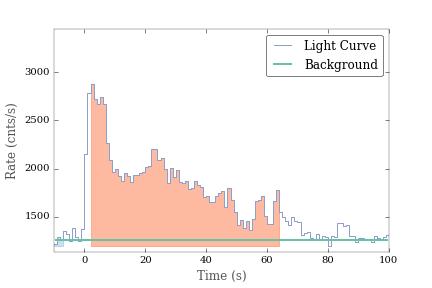

In [31]:
nai3.view_lightcurve(stop=100)

#### Model setup

We can use the model from the catalog and combine with the data into a JointLikelihood.

In [44]:

data_list = DataList(nai3,nai4,bgo0)

jl = JointLikelihood(models['GRB080916009'], data_list=data_list)

# Now we can fit

res = jl.fit()

Best fit values:



,Best fit value,Unit
GRB080916009.spectrum.main.Band.K,0.0177 +/- 0.0006,1 / (cm2 keV s)
GRB080916009.spectrum.main.Band.alpha,-0.976 +/- 0.023,
GRB080916009.spectrum.main.Band.beta,-2.12 +/- 0.10,
GRB080916009.spectrum.main.Band.xp,(4.8 +/- 0.4)e+02,keV



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.91,-0.95,0.38
0.91,1.00,-0.86,0.31
-0.95,-0.86,1.00,-0.52
0.38,0.31,-0.52,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,3195.120128
n3,1043.011756
n4,1034.740043
b0,1117.368329


<IPython.core.display.Javascript object>


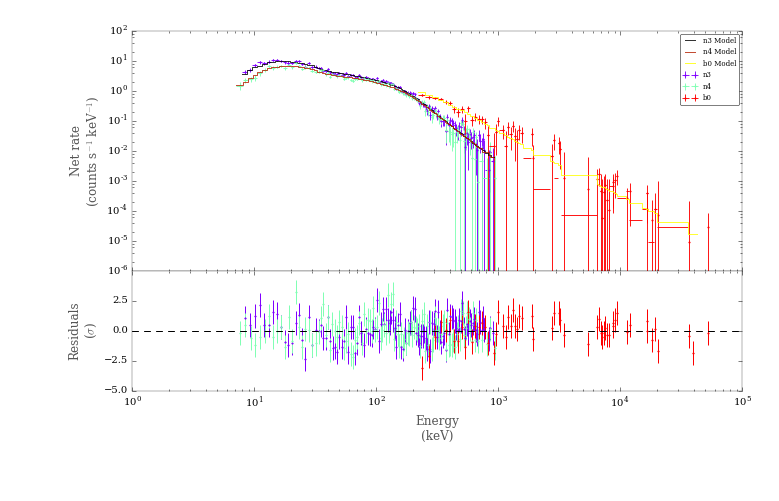

In [42]:
_ = display_ogip_model_counts(jl)

## LLE Catalog

### Searching
Similar to the GBM catalog, we can search LAT LLE triggers with the LLE catalog:


In [15]:
lle_catalog = FermiLLEBurstCatalog()

The cache for fermille does not yet exist. We will try to build it

Building cache for fermille.



We can perform cone, time, and trigger searches just like as with the GBM catalog. Currently, no T90 searches are available.

In [16]:
lle_catalog.cone_search(0,0,300)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermille&


name,ra,dec,trigger_time,trigger_type
,deg,deg,mjd,
object,float64,float64,float64,object
GRB080825593,234.000,-4.700,54703.5929179,GRB
GRB080916009,119.800,-56.600,54725.0088613,GRB
GRB081024891,322.900,21.200,54763.8907507,GRB
GRB081224887,201.700,75.100,54824.8874469,GRB
GRB090217206,204.900,-8.400,54879.2060481,GRB
GRB090227772,11.800,32.200,54889.7715441,GRB
GRB090323002,190.700,17.100,54913.0018823,GRB
GRB090328401,90.900,-42.000,54918.4005383,GRB


In [17]:
lle_catalog.search_trigger_name('bn080916009')

name,ra,dec,trigger_time,trigger_type
,deg,deg,MJD,
str20,float64,float64,float64,str32
GRB080916009,119.800,-56.600,54725.0088613,GRB


In [18]:
lle_catalog.search_utc(utc_start='2010-01-01T00:00:00', utc_stop= '2011-01-01T00:00:00')

name,ra,dec,trigger_time,trigger_type
,deg,deg,MJD,
str20,float64,float64,float64,str32
GRB100116897,305.020,14.450,55212.8965306,GRB
GRB100225115,310.300,-59.400,55252.1149438,GRB
SFLARE100612038,84.390,18.790,55359.0382598,SFLARE
GRB100724029,119.599,75.856,55401.0292360,GRB
GRB100826957,284.000,-23.190,55434.9572095,GRB
GRB101123952,135.160,1.910,55523.9524881,GRB


In [21]:
lle_catalog.search_trigger_type('SFLARE')

name,ra,dec,trigger_time,trigger_type
,deg,deg,MJD,
str20,float64,float64,float64,str32
SFLARE100612038,84.390,18.790,55359.0382598,SFLARE
SFLARE110809334,138.710,15.964,55782.3340416,SFLARE
SFLARE110906929,165.089,6.365,55810.9286792,SFLARE
SFLARE110924399,180.771,-0.334,55828.3990585,SFLARE
SFLARE120603745,71.970,22.403,56081.7448368,SFLARE
SFLARE120806191,136.420,16.639,56145.1913878,SFLARE
SFLARE121023135,207.861,-11.453,56223.1352032,SFLARE
SFLARE131025873,210.230,-12.312,56590.8727337,SFLARE


## Downloading LLE data

With the soon to be released 3ML LLE plugin, we no longer need PHA files. Therefore, the 3ML LLE downloader will get the LLE event file and associated LLE RSP (if it exists).

In [22]:
file_info = download_LLE_trigger_data('bn080916009')

error: [Errno 65] No route to host

In [50]:
file_info

{'lle': '/Users/jburgess/Research/coding/3ML/examples/gll_lle_bn080916009_v10.fit',
 'rsp': '/Users/jburgess/Research/coding/3ML/examples/gll_cspec_bn080916009_v10.rsp'}

## Analysis with GBM and LLE data

Analyze the LLE data you have just downloaded

In [20]:
lle = FermiLATLLELike('LLE',
                      lle_file=file_info['lle'],
                      rsp_file=file_info['rsp'],
                      ft2_file=file_info['ft2'],
                      background_selections=det_info['background']['full'],
                      source_intervals=det_info['source']['fluence']
                     )

In [ ]:
lle = FermiLATLLELike

In [18]:
import ftplib
ftp = ftplib.FTP('129.164.179.23')
ftp.connect()

error: [Errno 60] Operation timed out